### New
Instead of using CAMB to compute the distance modulus, I directly integrate the Hubble function.

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

import sys
sys.path.append("../")
from pyACC.cosmology import Dc_w0waCDM

### Why Direct Substitution is Incorrect

Inserting $w(z) = w_0 + w_a \frac{z}{1+z}$ directly into the Hubble parameter expression without proper integration will not capture the correct evolution of dark energy. The correct approach requires integrating the varying equation of state to accurately reflect its impact on the dark energy density.

#### Derivation with Variable $w(z)$

For a time-varying $w(z)$, the dark energy density evolves as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} \exp \left( 3 \int_0^z \frac{1 + w(z')}{1 + z'} \, dz' \right)
$$

Given $w(z) = w_0 + w_a \frac{z}{1+z}$, the integral becomes:

$$
\int_0^z \frac{1 + w(z')}{1 + z'} \, dz' = \int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz'
$$

Evaluating this integral:

$$
\int_0^z \frac{1 + w_0 + w_a \frac{z'}{1 + z'}}{1 + z'} \, dz' = (1 + w_0) \ln(1 + z) + w_a \frac{z}{1 + z}
$$

Thus, the dark energy density can be written as:

$$
\rho_\Lambda(z) = \rho_{\Lambda 0} (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)
$$

#### Correct Expression for $H(z)$

Incorporating this into the Hubble parameter, we get:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + \Omega_\Lambda (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

For a flat universe ($\Omega_k = 0$), where $\Omega_\Lambda = 1 - \Omega_m - \Omega_r$, this simplifies to:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0)} \exp \left( 3 w_a \frac{z}{1+z} \right)}
$$

#### Why Direct Substitution is Incorrect

Directly substituting $w = w_0 + w_a (1 - a)$ into:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w)}}
$$

would give:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(1+w_0 + w_a (1 - a))}}
$$

This approach ignores the integral needed to correctly account for the varying $w(z)$ over time. The exponential factor $\exp \left( 3 w_a \frac{z}{1+z} \right)$ from proper integration is crucial for accurately describing the effects of the time-varying equation of state.


The Hubble parameter $ H(z) $ for the $w_0 w_a$ CDM model is given by:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} \exp\left[ 3 \int_0^z \frac{w(z')}{1+z'} \, dz' \right]}
$$

where the dark energy equation of state $ w(z) $ is:

$$
w(z) = w_0 + w_a \frac{z}{1+z}
$$

and

$$
3 \int_0^z \frac{w(z')}{1+z'} \, dz' = 3 \left[ w_0 \ln(1+z) - w_a \frac{z}{1+z} \right]
$$

Thus, the Hubble parameter becomes:

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{\Lambda} (1+z)^{3(w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

$\rightarrow$

$$
H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1-\Omega_{m}-\Omega_{r}) (1+z)^{3(w_0 + w_a)} \exp \left(-3 w_a \frac{z}{1+z} \right)}
$$

In [184]:
def hubble_function(z,H0,Omega_m,Omega_r,w0,wa):
    return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*(1+z)**(3*(w0+wa))*np.exp(-3*wa*z/(1+z)))

'''
#chat GPT suggests:
def hubble_function(z, H0, Omega_m, Omega_r, w0, wa):
    # Calculate the dark energy density parameter Omega_Lambda
    Omega_Lambda = 1 - Omega_m - Omega_r
    
    # Calculate the integral term for the evolving dark energy
    integral_term = 3 * (w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    
    # Calculate the Hubble parameter
    return H0 * np.sqrt(
        Omega_m * (1 + z)**3 + 
        Omega_r * (1 + z)**4 + 
        Omega_Lambda * (1 + z)**integral_term
    )
'''

'\n#chat GPT suggests:\ndef hubble_function(z, H0, Omega_m, Omega_r, w0, wa):\n    # Calculate the dark energy density parameter Omega_Lambda\n    Omega_Lambda = 1 - Omega_m - Omega_r\n    \n    # Calculate the integral term for the evolving dark energy\n    integral_term = 3 * (w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)\n    \n    # Calculate the Hubble parameter\n    return H0 * np.sqrt(\n        Omega_m * (1 + z)**3 + \n        Omega_r * (1 + z)**4 + \n        Omega_Lambda * (1 + z)**integral_term\n    )\n'

### File

In [185]:
file_path = 'lcparam_full_long.txt'

with open(file_path, 'r') as file:
    header_line = file.readline().strip()
    header = header_line.lstrip('#').strip()

header_words = header.split()
header_words.pop()
header = ' '.join(header_words)

data = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)
data.columns = header.split()

z_data = data['zcmb'].values
mb = data['mb'].values #B-band peak magnitude
dmb = data['dmb'].values

Sigma = np.diag(dmb**2)
Sigma_inv = np.linalg.inv(Sigma)

### Relationship Between Hubble Function and Distance Modulus

1. **Luminosity Distance $d_L(z)$**

   The luminosity distance $d_L(z)$ is given by:

   $$
   d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
   $$

   For the Hubble parameter $H(z)$ in the $w_0w_a$ CDM model:

   $$
   H(z) = H_0 \sqrt{\Omega_m (1+z)^3 + \Omega_r (1+z)^4 + (1 - \Omega_m - \Omega_r) (1+z)^{3(w_0 + w_a)} \exp\left(-3 w_a \frac{z}{1+z}\right)},
   $$

   you can plug this into the integral to find $d_L(z)$.

2. **Distance Modulus $\mu(z)$**

   The distance modulus $\mu(z)$ is given by:

   $$
   \mu(z) = 5 \log_{10}(d_L(z)) + 25.
   $$

### Summary

- **Compute the Luminosity Distance:**
  
  Integrate the inverse of $H(z)$:

  $$
  d_L(z) = (1+z) \int_0^z \frac{dz'}{H(z')}.
  $$

- **Compute the Distance Modulus:**
  
  Once $d_L(z)$ is computed, use:

  $$
  \mu(z) = 5 \log_{10}(d_L(z)) + 25.
  $$

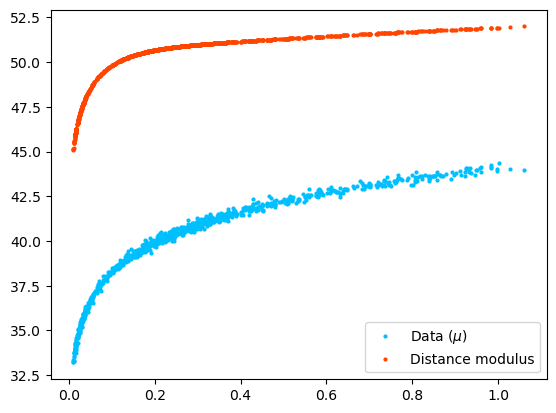

In [186]:
def get_mu(z,H0,Omega_m,Omega_r,w0,wa):
    #z=np.linspace(np.min(z),np.max(z),1000)
    comoving_distance=[]
    distance_modulus=[]
    for i in range(len(z)):
        comoving_distance.append(Dc_w0waCDM(hubble_function,z[i],Omega_m,Omega_r,w0,wa,H0))
        distance_modulus.append(5*np.log10(comoving_distance[i]*(1+z[i]))+25)
    return distance_modulus

#distance modulus of the data: mu_data=mb-M with M the absolute magnitude of a type Ia supernova, so M=-19.3
M=-19.3
mu_data=mb-M

plt.plot(z_data,mu_data,'o',markersize=2,color='deepskyblue',label='Data ($\mu$)')
plt.plot(z_data,get_mu(z_data,70,0.3,0,-1,0),'o',markersize=2,color='orangered',label='Distance modulus')
plt.legend()
plt.show()

### Likelihood

In [187]:
def log_likelihood(z,d,mu,cov_inv):
    diff=d-mu
    return -0.5 * diff @ cov_inv @ diff

### Prior

In [188]:
def log_prior(H0,Omega_m,Omega_r,w0,wa):
    if not 60<H0<80:
        print(f"H0 out of bounds: {H0}")
        return -np.inf
    if not 0.2<Omega_m<0.4:
        print(f"Omega_m out of bounds: {Omega_m}")
        return -np.inf
    if not 0<Omega_r<0.1:
        print(f"Omega_r out of bounds: {Omega_r}")
        return -np.inf
    if not -1<w0<0:
        print(f"w0 out of bounds: {w0}")
        return -np.inf
    if not -1<wa<1:
        print(f"wa out of bounds: {wa}")
        return -np.inf
    return 0.0

### Posterior

In [189]:
def log_posterior(H0,Omega_m,Omega_r,w0,wa,z,mu_data,cov_inv):
    lp = log_prior(H0,Omega_m,Omega_r,w0,wa)
    if not np.isfinite(lp):
        return -np.inf
    mu = get_mu(z,H0,Omega_m,Omega_r,w0,wa)[1]
    return lp + log_likelihood(z,mu_data,mu,cov_inv)

In [190]:
'''
log_likelihood_values = []
log_posterior_values = []

for i in range(100):
    H0 = np.random.uniform(60,80)
    Omega_m = np.random.uniform(0.2,0.4)
    Omega_r = np.random.uniform(0,0.1)
    w0 = np.random.uniform(-1,0)
    wa = np.random.uniform(-1,1)
    log_likelihood_values.append(log_likelihood(z_data,mu_data,get_mu(z_data,H0,Omega_m,Omega_r,w0,wa),Sigma_inv))
    log_posterior_values.append(log_posterior(H0,Omega_m,Omega_r,w0,wa,z_data,mb,Sigma_inv))

plt.hist(log_likelihood_values,bins=50)
plt.xlabel('log likelihood')
plt.ylabel('Frequency')
plt.show()

plt.hist(log_posterior_values,bins=50)
plt.xlabel('log posterior')
plt.ylabel('Frequency')
plt.show()
'''

"\nlog_likelihood_values = []\nlog_posterior_values = []\n\nfor i in range(100):\n    H0 = np.random.uniform(60,80)\n    Omega_m = np.random.uniform(0.2,0.4)\n    Omega_r = np.random.uniform(0,0.1)\n    w0 = np.random.uniform(-1,0)\n    wa = np.random.uniform(-1,1)\n    log_likelihood_values.append(log_likelihood(z_data,mu_data,get_mu(z_data,H0,Omega_m,Omega_r,w0,wa),Sigma_inv))\n    log_posterior_values.append(log_posterior(H0,Omega_m,Omega_r,w0,wa,z_data,mb,Sigma_inv))\n\nplt.hist(log_likelihood_values,bins=50)\nplt.xlabel('log likelihood')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.hist(log_posterior_values,bins=50)\nplt.xlabel('log posterior')\nplt.ylabel('Frequency')\nplt.show()\n"

### Parameter Optimization

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_41459/212300427.py:2: RuntimeWarning: overflow encountered in scalar power
  return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*(1+z)**(3*(w0+wa))*np.exp(-3*wa*z/(1+z)))
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_41459/212300427.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*(1+z)**(3*(w0+wa))*np.exp(-3*wa*z/(1+z)))
/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_41459/212300427.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return H0*np.sqrt(Omega_m*(1+z)**3+Omega_r*(1+z)**4+(1-Omega_m-Omega_r)*(1+z)**(3*(w0+wa))*np.exp(-3*wa*z/(1+z)))
/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The

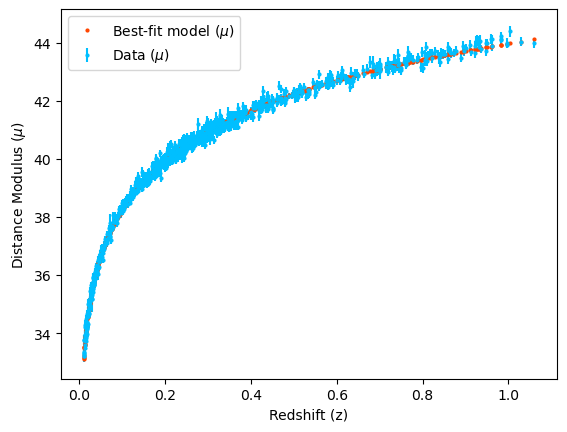

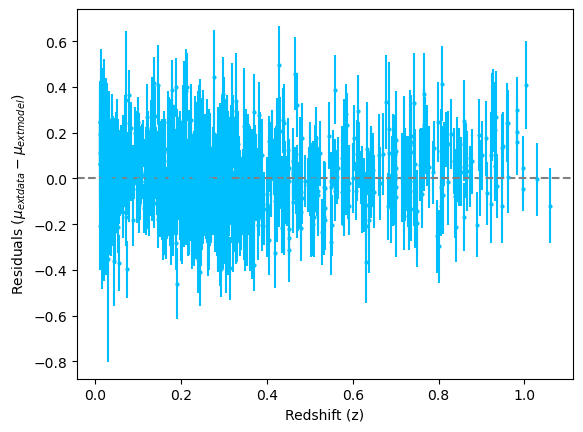

In [191]:
initial_guess = [70, 0.3, 0, -1, 0]

result = minimize(lambda params: -log_likelihood(z_data,mu_data,get_mu(z_data,*params),Sigma_inv), initial_guess, method='Nelder-Mead')
best_fit_params = result.x

mu_model_best = get_mu(z_data, *best_fit_params)

# Plot the data with the best-fit model
plt.errorbar(z_data, mu_data, yerr=dmb, fmt='o', markersize=2, color='deepskyblue', label='Data ($\mu$)')
plt.plot(z_data, mu_model_best, 'o', markersize=2, color='orangered', label='Best-fit model ($\mu$)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus ($\mu$)')
plt.legend()
plt.show()

# Calculate and plot residuals
residuals = mu_data - mu_model_best
plt.errorbar(z_data, residuals, yerr=dmb, fmt='o', markersize=2, color='deepskyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals ($\mu_{\text{data}} - \mu_{\text{model}}$)')
plt.show()

In [193]:
# Print the best-fit parameters
print("Best-fit parameters:")
print("H0:", best_fit_params[0])
print("Omega_m:", best_fit_params[1])
print("Omega_r:", best_fit_params[2])
print("w0:", best_fit_params[3])
print("wa:", best_fit_params[4])

# Calculate chi-square value for reference
chi2 = -2 * log_likelihood(z_data, mu_data, mu_model_best, Sigma_inv)
print("Chi-square:", chi2)
print("Degrees of freedom:", len(z_data) - len(best_fit_params))

Best-fit parameters:
H0: 0.4927274478482136
Omega_m: 73.67899733902641
Omega_r: -0.22898973197140776
w0: 0.3633872784960468
wa: -0.35097456000177407
Chi-square: 1044.9062813231812
Degrees of freedom: 1017
